In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime, timedelta
warnings.filterwarnings('ignore')

In [233]:
df = pd.read_csv('/Users/vishnusaibhadramraju/Desktop/projects/My Uber Drives - 2016.csv')

In [234]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [235]:
# Finding data description
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [236]:
# Describe
df.describe()

,MILES*
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [237]:
# Columns renaming
def rename_columns_remove_last_char(df: pd.DataFrame) -> pd.DataFrame:
    # Rename columns by removing the last character in each column name
    df.columns = [col[:-1].lower() for col in df.columns]
    return df
df = rename_columns_remove_last_char(df)
df.columns

Index(['start_date', 'end_date', 'category', 'start', 'stop', 'miles',
       'purpose'],
      dtype='object')

In [238]:
# Null values
df.isnull().sum()

start_date      0
end_date        1
category        1
start           1
stop            1
miles           0
purpose       503
dtype: int64

<Axes: >

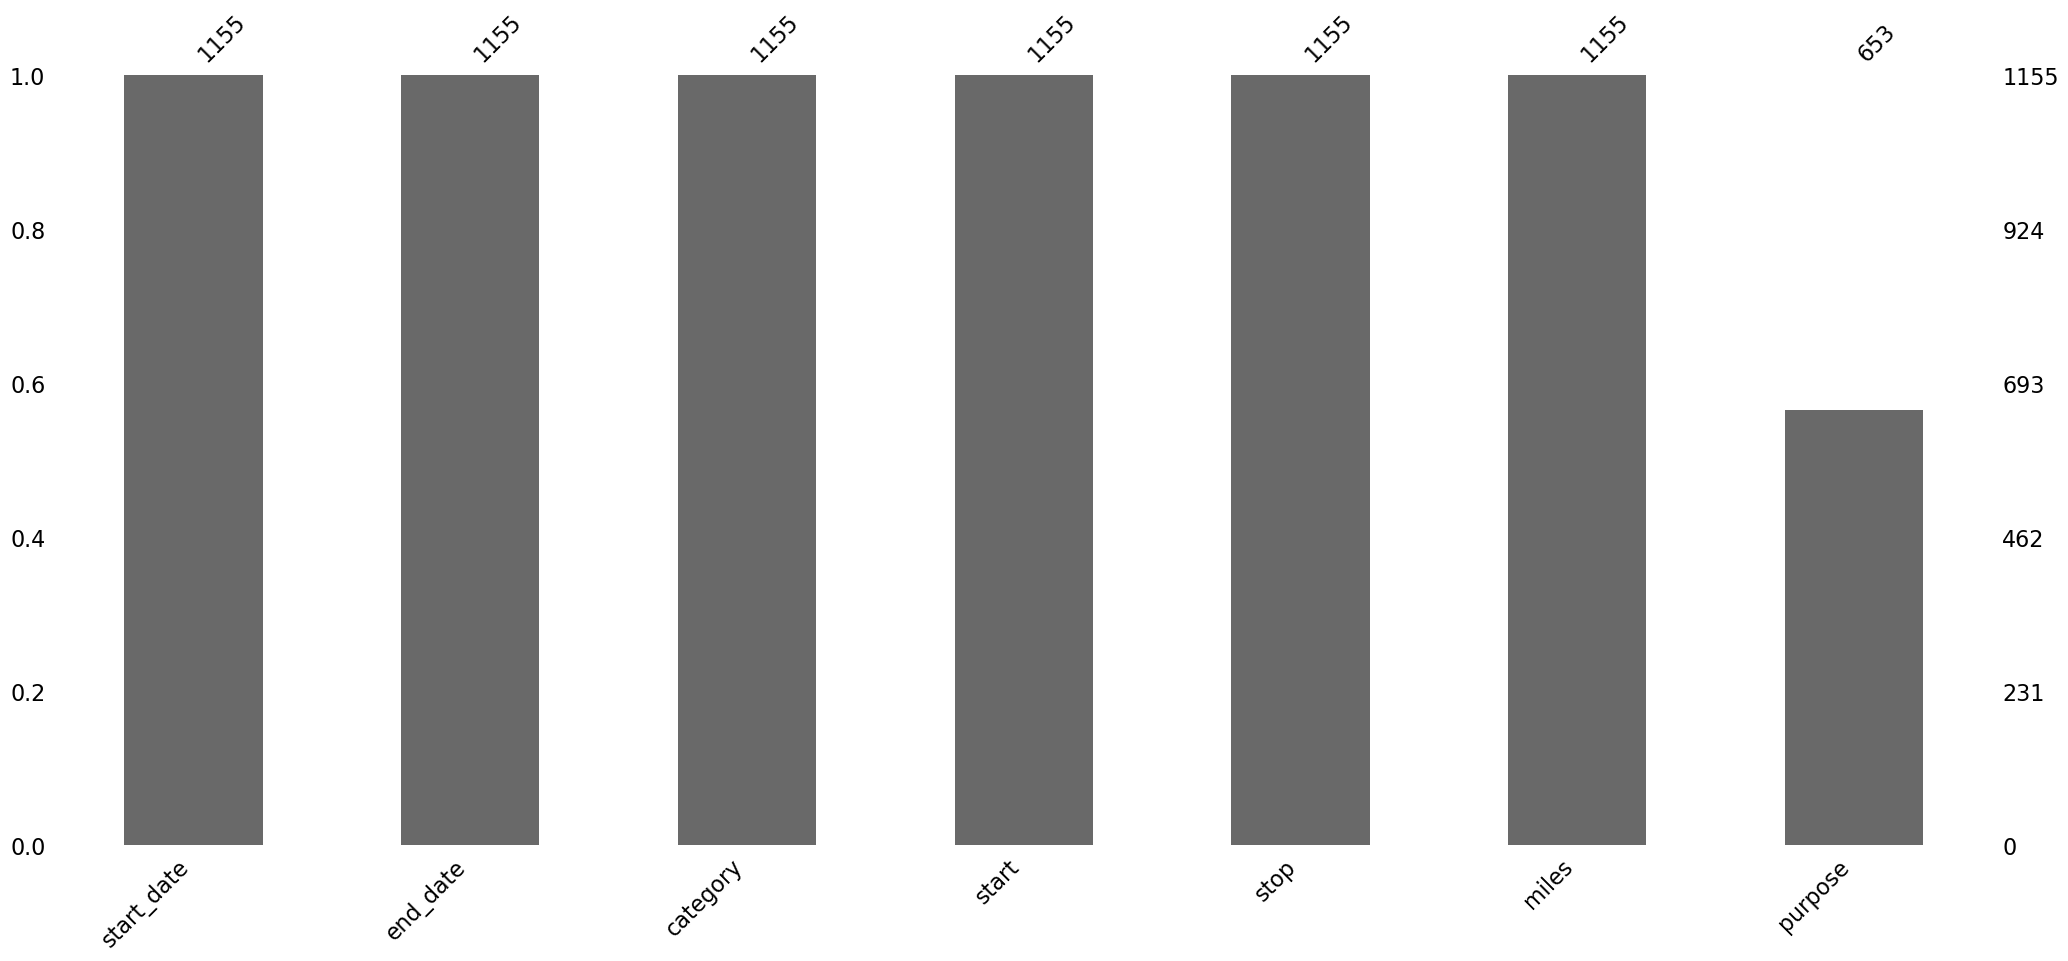

In [242]:
import missingno as msn
msn.bar(df)

<Axes: >

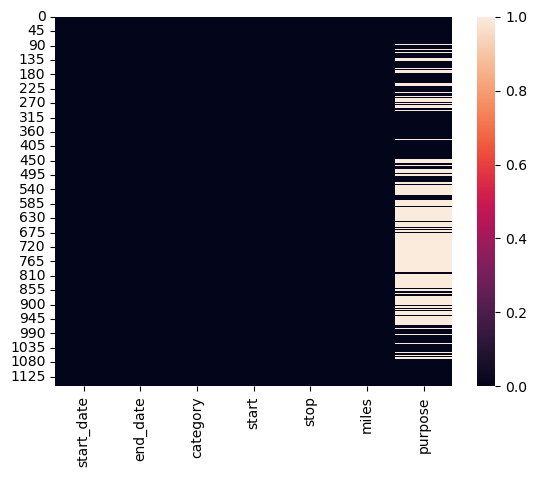

In [239]:
# Null values through heatmap
sns.heatmap(df.isnull())

In [240]:
#dropping nulls
df.dropna(subset = 'end_date',inplace = True)

In [241]:
df.shape

(1155, 7)

In [243]:
# converting to datetime
df['start_date'] = pd.to_datetime(df['start_date'], errors = 'coerce')
df['end_date'] = pd.to_datetime(df['end_date'],errors = 'coerce')

In [244]:
df['start_month'] = df['start_date'].dt.month
df['end_month'] = df['end_date'].dt.month
df['start_time'] = df['start_date'].dt.time
df['end_time'] = df['end_date'].dt.time
df['week_number'] = df['start_date'].dt.isocalendar().week
df['day_of_month'] = df['start_date'].dt.day_name()
df['year'] = df['start_date'].dt.year

In [246]:
month_dict = {
        "start_month": {
            1 : "Jan",
             2 :  "Feb",
             3: "Mar",
             4: "Apr",
             5: "May",
             6: "Jun",
             7: "Jul",
             8: "Aug",
             9: "Sep",
             10: "Oct",
             11: "Nov",
             12: "Dec",
        },
"end_month": {
            1 : "Jan",
             2 :  "Feb",
             3: "Mar",
             4: "Apr",
             5: "May",
             6: "Jun",
             7: "Jul",
             8: "Aug",
             9: "Sep",
             10: "Oct",
             11: "Nov",
             12: "Dec",
        }}

df= df.replace(month_dict)

In [247]:
df.head()

,start_date,end_date,category,start,stop,miles,purpose,start_month,end_month,start_time,end_time,week_number,day_of_month,year
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Jan,Jan,21:11:00,21:17:00,53,Friday,2016
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,Jan,Jan,01:25:00,01:37:00,53,Saturday,2016
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Jan,Jan,20:25:00,20:38:00,53,Saturday,2016
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Jan,Jan,17:31:00,17:45:00,1,Tuesday,2016
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Jan,Jan,14:42:00,15:49:00,1,Wednesday,2016


In [248]:
df['duration'] = df['end_date']-df['start_date']

In [250]:
df.head()

,start_date,end_date,category,start,stop,miles,purpose,start_month,end_month,start_time,end_time,week_number,day_of_month,year,duration
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Jan,Jan,21:11:00,21:17:00,53,Friday,2016,0 days 00:06:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,Jan,Jan,01:25:00,01:37:00,53,Saturday,2016,0 days 00:12:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Jan,Jan,20:25:00,20:38:00,53,Saturday,2016,0 days 00:13:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Jan,Jan,17:31:00,17:45:00,1,Tuesday,2016,0 days 00:14:00
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Jan,Jan,14:42:00,15:49:00,1,Wednesday,2016,0 days 01:07:00


In [265]:
# Filling nulls values
df['purpose'].fillna(method= 'ffill', inplace = True)

<Axes: ylabel='start_month'>

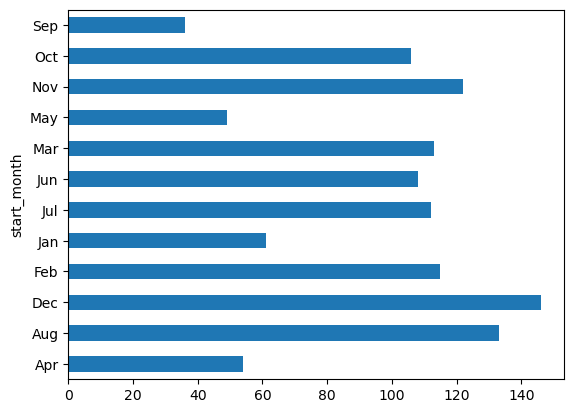

In [251]:
# months with higest rides

df.groupby('start_month')['start_month'].count().plot.barh()

In [252]:
category = pd.crosstab(index=df['purpose'], columns= 'count_of_columns').rename(columns={0:'count'}).reset_index()

In [253]:
cat = pd.DataFrame(category).set_index('purpose')

<Axes: xlabel='purpose'>

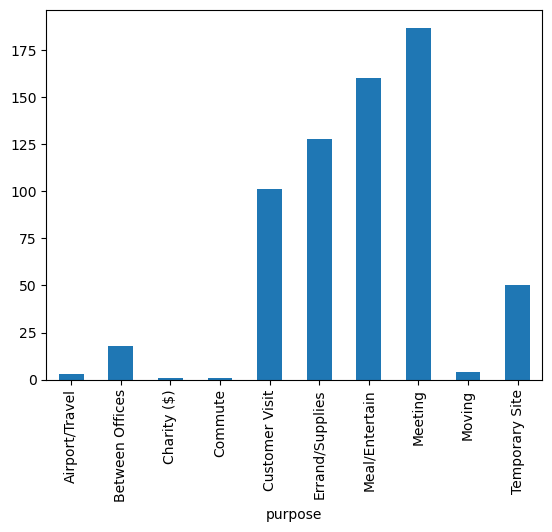

In [254]:
cat.plot.bar(legend= False)

In [255]:
# need duration 
df['duration'] = df['duration'].astype(str)
df['time'] = df['duration'].apply(lambda x: x.split(' days ')[-1])


In [256]:
df['time'] = df['time'].apply(lambda x: datetime.strptime(x, '%H:%M:%S').time())


In [257]:
rides_with = df['time'].value_counts().reset_index()

In [258]:
rides_with['time'] = rides_with['time'].apply(lambda x: x.minute)

In [259]:
rides_with['time']= rides_with['time'].astype('str')

In [260]:
most_mins_of_ride = rides_with[rides_with['count']>=10]

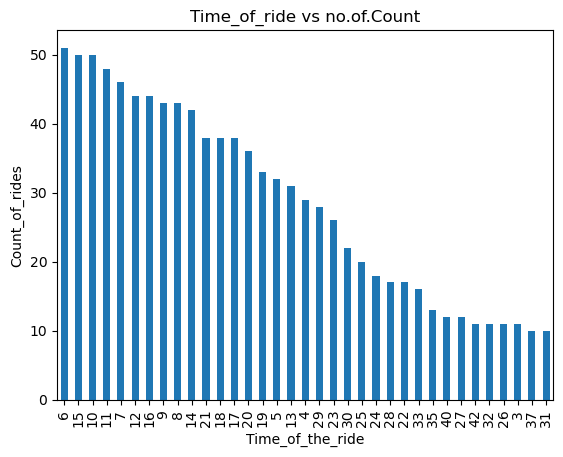

In [261]:
# Plotting the bar graph
most_mins_of_ride.plot(kind='bar', x='time', y='count', legend=False)

# Adding titles and labels
plt.title('Time_of_ride vs no.of.Count')
plt.xlabel('Time_of_the_ride')
plt.ylabel('Count_of_rides')

# Display the plot
plt.show()

In [262]:
# Dropping columns
df.drop(columns=['duration'],inplace = True)
# df.start_time.value_coun

In [268]:
# We have no use for start_time and end_time since we got time in our columns, and start and end month same so we dont need both
df.drop(columns = ['end_month','start_time','end_time'], inplace = True)

In [269]:
df

,start_date,end_date,category,start,stop,miles,purpose,start_month,week_number,day_of_month,year,time
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Jan,53,Friday,2016,00:06:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,Jan,53,Saturday,2016,00:12:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Jan,53,Saturday,2016,00:13:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Jan,1,Tuesday,2016,00:14:00
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Jan,1,Wednesday,2016,01:07:00
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,Jan,1,Wednesday,2016,00:04:00
6,2016-01-06 17:30:00,2016-01-06 17:35:00,Business,West Palm Beach,Palm Beach,7.1,Meeting,Jan,1,Wednesday,2016,00:05:00
7,2016-01-07 13:27:00,2016-01-07 13:33:00,Business,Cary,Cary,0.8,Meeting,Jan,1,Thursday,2016,00:06:00
8,2016-01-10 08:05:00,2016-01-10 08:25:00,Business,Cary,Morrisville,8.3,Meeting,Jan,1,Sunday,2016,00:20:00
9,2016-01-10 12:17:00,2016-01-10 12:44:00,Business,Jamaica,New York,16.5,Customer Visit,Jan,1,Sunday,2016,00:27:00


In [278]:
# Which week has highest rides
weekly_ride_count = df.week_number.value_counts().to_frame().reset_index()

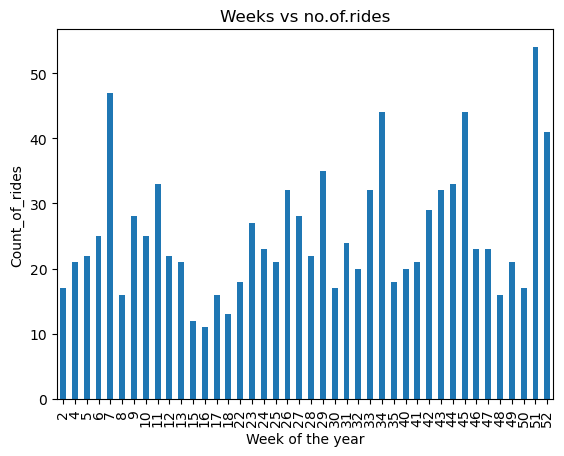

<Figure size 2000x2000 with 0 Axes>

In [285]:
rides_in_weeks= weekly_ride_count[weekly_ride_count['count']>10].sort_values(by='week_number')
# Plotting the bar graph
rides_in_weeks.plot(kind='bar', x='week_number', y='count', legend=False)

# Adding titles and labels
plt.title('Weeks vs no.of.rides')
plt.xlabel('Week of the year')
plt.ylabel('Count_of_rides')
plt.figure
# Display the plot
plt.figure(figsize=(20, 20))
plt.show()

In [286]:
# Lets investigate miles

df['miles'] = df['miles'].round()

In [296]:
# value_counts
rides_with_miles_counts = df['miles'].value_counts().reset_index()


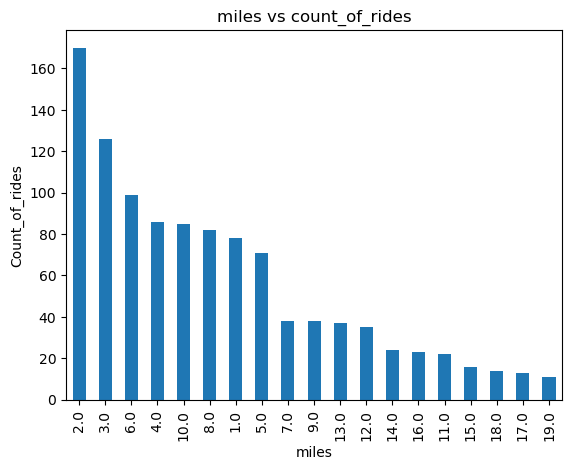

<Figure size 2000x2000 with 0 Axes>

In [298]:
rmc = rides_with_miles_counts[rides_with_miles_counts['count']>=10]
rmc.plot(kind='bar', x= 'miles', y='count', legend=False)
plt.title('miles vs count_of_rides')
plt.xlabel('miles')
plt.ylabel('Count_of_rides')
plt.figure
# Display the plot
plt.figure(figsize=(20, 20))
plt.show()

<Axes: ylabel='day_of_month'>

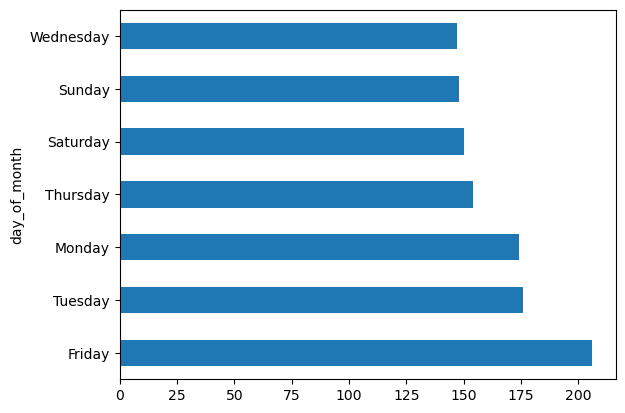

In [303]:
# Lets investigate days of week

df['day_of_month'].value_counts().plot.barh()

In [322]:
# Lets investage catefory
cat= pd.crosstab(index=df['category'],columns='count_of_rides').reset_index().set_index('category')
cat

col_0,count_of_rides
category,
Business,1078
Personal,77


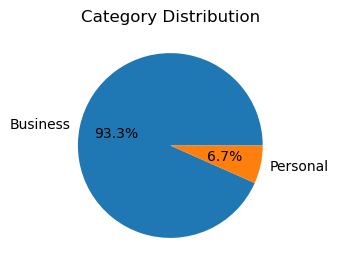

In [326]:
# Plotting the pie chart
cat.plot(kind='pie', y='count_of_rides', autopct='%1.1f%%', figsize=(3, 3), legend=False)

# Adding a title
plt.title('Category Distribution')
plt.ylabel('')
# Display the plot

plt.show()

In [343]:
# Counts of rides start at 
most_rides_start = df['start'].value_counts().to_frame().reset_index()
most_rides_start

,start,count
0,Cary,201
1,Unknown Location,148
2,Morrisville,85
3,Whitebridge,68
4,Islamabad,57
5,Durham,37
6,Lahore,36
7,Raleigh,28
8,Kar?chi,27
9,Westpark Place,17


<Axes: xlabel='start'>

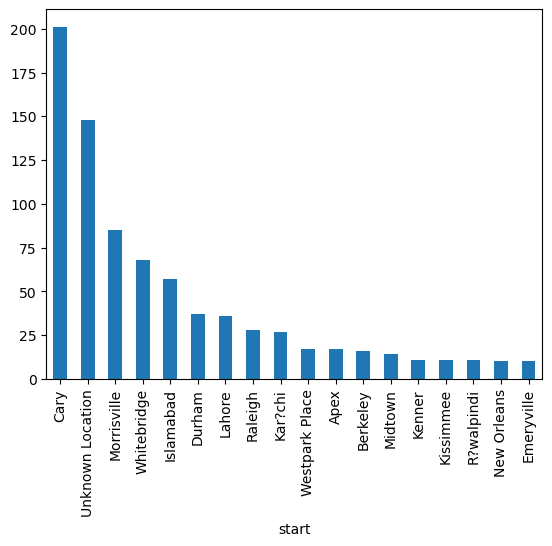

In [344]:
most_rides_start = most_rides_start[most_rides_start['count']>=10].set_index('start')
most_rides_start.plot.bar(legend=False)

In [ ]:
# Counts of rides start at 
most_rides_start = df['start'].value_counts().to_frame().reset_index()
most_rides_start